# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-122A *Spatial* Data Science 


## Lab 1 - part 1: Data, Grammar and Engineering (Pandas)

**TU Delft**<br>
**Q2 2023**<br>
**Instructor:** Trivik Verma <br>
**[Centre for Urban Science & Policy]( https://cusp.tbm.tudelft.nl/)** <br>

---


## Table of Contents

* [Learning Goals](#section0)
* [Data Munging](#section1)
    * [Dataset](#section_1_1)
    * [Data, Sliced and Diced](#section_1_2)
* [Visual Exploration](#section2)
    * [Histogram](#section_2_1)
    * [Kernel Density Plots](#section_2_2) 
    * [Line and Bar Plots](#section_2_3)
* [(Un)tidy Data](#section3)
    * [Grouping, transforming, aggregating](#section_3_1)

## Learning Goals <a class="anchor" id="section0"></a>

- Obtain the basic tools to manipulate, investigate and visualise the data. 
- Understand the concept of tidy/untidy data and how to prepare the data.

This notebook covers the basic tools of data analysis that are **needed** for the course.

## Data Munging <a class="anchor" id="section1"></a>

Real world datasets are messy. There is no way around it: datasets have "holes" (missing data), the amount of formats in which data can be stored is endless, and the best structure to share data is not always the optimum to analyze them, hence the need to [munge](https://dictionary.reference.com/browse/munge) them. As has been correctly pointed out in many outlets ([e.g.](https://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0)), much of the time [spent](https://twitter.com/BigDataBorat/status/306596352991830016) in what is called (Geo-)Data Science is related not only to sophisticated modeling and insight, but has to do with much more basic and less exotic tasks such as obtaining data, processing, turning them into a shape that makes analysis possible, and exploring it to get to know their basic properties. 

For how labor intensive and relevant this aspect is, there is surprisingly very little published on patterns, techniques, and best practices for quick and efficient data cleaning, manipulation, and transformation. In this session, you will use a few real world datasets and learn how to process them into Python so they can be transformed and manipulated, if necessary, and analyzed. For this, we will introduce some of the bread and butter of data analysis and scientific computing in Python. These are fundamental tools that are constantly used in almost any task relating to data analysis.

This notebook covers the basic and the content that is expected to be learnt by every student. We use a prepared dataset that saves us much of the more intricate processing that goes beyond the introductory level the session is aimed at. As a companion to this introduction, there is an additional notebook (see link on the website page for Lab 01) that covers how the dataset used here was prepared from raw data downloaded from the internet, and includes some additional exercises you can do if you want dig deeper into the content of this lab.

In this notebook, we discuss several patterns to clean and structure data properly, including tidying, subsetting, and aggregating; and we finish with some basic visualization. An additional extension presents more advanced tricks to manipulate tabular data.

Before we get our hands data-dirty, let us import all the additional libraries we will need, so we can get that out of the way and focus on the task at hand:

In [1]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import os              # This provides several system utilities

### Dataset <a class="anchor" id="section_1_1"></a>

We will be exploring some of the characteristics of the population in The Hague. To do that, we will use a dataset that contains population counts, split by ethnic origin: https://denhaag.incijfers.nl/jive. Let us first set the path to the file where we store the data we will use:

In [2]:
# Important! You need to specify the path to the data in *your* machine
# If you have placed the data folder in the same directory as this notebook,
# you would do:

f = 'data/DenHaag'                   # Path to file containing the table

# Check to see if the path is correct and works. If you have set it 
# correctly, you should obtain the following list
os.listdir(f)

['neighborhoods.prj',
 'Den_Haag_long.csv',
 'DenHaag.csv',
 'DenHaag.xlsx',
 'neighborhoods.shp',
 'neighborhoods.cpg',
 'neighborhoods.shx',
 'DenHaag_short.csv',
 'neighborhoods.dbf',
 'DenHaag_.csv',
 'neighborhoods.json']

**IMPORTANT**: the path above might look different in your computer.

To read a "comma separated values" (`.csv`) file, we can run:

In [7]:
# We are going to work with DenHaag_.csv. Let's adjust the path:
f = 'data/DenHaag/DenHaag_.csv'
db = pd.read_csv(f, index_col='Buurten')    # Read the table in

Let us stop for a minute to learn how we have read the file. Here are the main aspects to keep in mind:

* We are using the method `read_csv` from the `pandas` library, which we have imported with the alias `pd`.
* In this form, all that is required is to pass the path to the file we want to read, which in this case we have created by concatenating two strings. We can see the full path we have used:


In [8]:
f

'data/DenHaag/DenHaag_.csv'

* the `sep` argument defines the seperator. It is default set to `,` which is also the standard deperator in a csv file. In our case the dataset is seperated by `;` however.
* The argument `index_col` is not strictly necessary but allows us to choose one of the columns as the index of the table. More on indices below.
* We are using `read_csv` because the file we want to read is in the `csv` format. However, `pandas` allows for many more formats to be read (and written, just replace `read` by `to`! For example, `read_csv` reads in, `to_csv` writes out). A full list of formats supported may be found [here](https://pandas.pydata.org/pandas-docs/version/0.18.1/io.html).

### Data, Sliced and Diced <a class="anchor" id="section_1_2"></a>

Now we are ready to start playing and interrogating the dataset! What we have at our fingertips is a table that summarizes, for each of the LSOAs in Liverpool, how many people live in each, by the region of the world where they were born. Now, let us learn a few cool tricks built into `pandas` that work out-of-the box with a table like ours.

* Inspecting what it looks like. We can check the top (bottom) X lines of the table by passing X to the method `head` (`tail`). For example, for the top/bottom five lines:

In [9]:
db.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023
Buurten,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9


In [10]:
db.tail()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023
Buurten,,,,,,,,,,,,,,,
117 De Rivieren,24.0,NaN,NaN,NaN,5.0,13.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN
118 De Lanen,5368.0,272.0,973.0,500.0,1655.0,1657.0,276.0,35.0,49.6,4.2,4.2,11.6,2.9,16.0,11.5
119 De Velden,4162.0,145.0,528.0,344.0,1148.0,1427.0,491.0,79.0,55.0,4.0,4.6,10.3,1.1,14.6,10.4
120 De Vissen,8346.0,350.0,998.0,704.0,2077.0,2929.0,998.0,290.0,58.3,2.6,4.0,11.5,1.7,10.7,11.2
121 Rietbuurt,2758.0,145.0,660.0,184.0,873.0,742.0,137.0,17.0,47.7,4.6,7.7,10.8,1.9,15.4,11.8


- Now lets get an overview of data types

In [11]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 01 Oud Scheveningen to 121 Rietbuurt
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Aantal inwoners per 1-1|2023  111 non-null    float64
 1   0 t/m 4 jaar|2023             107 non-null    float64
 2   5 t/m 14 jaar|2023            107 non-null    float64
 3   15 t/m 19 jaar|2023           107 non-null    float64
 4   20 t/m 44 jaar|2023           110 non-null    float64
 5   45 t/m 64 jaar|2023           111 non-null    float64
 6   65 t/m 79 jaar|2023           110 non-null    float64
 7   80 jaar en ouder|2023         107 non-null    float64
 8   % Nederlands|2023             111 non-null    float64
 9   % Turks|2023                  103 non-null    float64
 10  % Marokkaans|2023             95 non-null     float64
 11  % Surinaams|2023              104 non-null    float64
 12  % Antilliaans|2023            102 non-nul

In [12]:
db.describe()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023
count,111.000000,107.000000,107.000000,107.000000,110.000000,111.000000,110.000000,107.000000,111.000000,103.000000,95.000000,104.000000,102.000000,109.000000,110.000000
mean,5073.171171,268.943925,574.616822,302.934579,1914.481818,1308.882883,589.663636,183.934579,46.553153,6.464078,5.271579,7.153846,2.480392,12.660550,21.500909
std,3365.942907,189.016363,393.491067,213.279083,1474.818973,861.831124,406.969022,154.038483,20.036666,7.530967,5.309900,5.091472,2.011110,5.379695,8.391034
min,24.000000,10.000000,6.000000,8.000000,5.000000,13.000000,5.000000,5.000000,5.800000,0.300000,0.100000,0.500000,0.300000,3.300000,7.300000
25%,2386.500000,118.500000,257.000000,110.500000,714.500000,644.000000,316.500000,80.000000,27.900000,1.050000,1.100000,2.200000,1.100000,8.800000,13.975000
50%,4744.000000,245.000000,528.000000,285.000000,1640.000000,1205.000000,498.000000,144.000000,49.600000,3.000000,3.900000,6.700000,1.850000,11.100000,20.750000
75%,7237.500000,399.000000,845.500000,442.000000,2835.750000,1866.500000,799.750000,225.500000,61.250000,10.000000,7.750000,11.525000,3.400000,16.600000,27.025000
max,16749.000000,889.000000,1738.000000,989.000000,6768.000000,4004.000000,2343.000000,750.000000,100.000000,28.400000,24.700000,21.100000,11.700000,28.000000,40.800000



Note how the output is also a `DataFrame` object, so you can do with it the same things you would with the original table (e.g. writing it to a file). In this case, the summary might be better presented if the table is "transposed":

In [13]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Aantal inwoners per 1-1|2023,111.0,5073.171171,3365.942907,24.0,2386.500,4744.00,7237.500,16749.0
0 t/m 4 jaar|2023,107.0,268.943925,189.016363,10.0,118.500,245.00,399.000,889.0
5 t/m 14 jaar|2023,107.0,574.616822,393.491067,6.0,257.000,528.00,845.500,1738.0
15 t/m 19 jaar|2023,107.0,302.934579,213.279083,8.0,110.500,285.00,442.000,989.0
20 t/m 44 jaar|2023,110.0,1914.481818,1474.818973,5.0,714.500,1640.00,2835.750,6768.0
45 t/m 64 jaar|2023,111.0,1308.882883,861.831124,13.0,644.000,1205.00,1866.500,4004.0
65 t/m 79 jaar|2023,110.0,589.663636,406.969022,5.0,316.500,498.00,799.750,2343.0
80 jaar en ouder|2023,107.0,183.934579,154.038483,5.0,80.000,144.00,225.500,750.0
% Nederlands|2023,111.0,46.553153,20.036666,5.8,27.900,49.60,61.250,100.0
% Turks|2023,103.0,6.464078,7.530967,0.3,1.050,3.00,10.000,28.4


* Equally, common descriptive statistics are also available:

In [14]:
# Obtain minimum values for each table
db.min()

Aantal inwoners per 1-1|2023    24.0
0 t/m 4 jaar|2023               10.0
5 t/m 14 jaar|2023               6.0
15 t/m 19 jaar|2023              8.0
20 t/m 44 jaar|2023              5.0
45 t/m 64 jaar|2023             13.0
65 t/m 79 jaar|2023              5.0
80 jaar en ouder|2023            5.0
% Nederlands|2023                5.8
% Turks|2023                     0.3
% Marokkaans|2023                0.1
% Surinaams|2023                 0.5
% Antilliaans|2023               0.3
% Overig niet-westers|2023       3.3
% Westers|2023                   7.3
dtype: float64

In [15]:
# Obtain the minimum population share of Marokaans
db['% Marokkaans|2023'].min()

0.1

In [16]:
# Obtain standard deviation for the row `117 De Rivieren`, 
# Does this value have any informative value for us? 
db.loc['117 De Rivieren', :].std()

43.699733027407234

* Creation of new variables: we can generate new variables by applying operations on existing ones. For example, we can calculate the total population by area. Here is a couple of ways to do it:

In [17]:
# One shot
total = db.sum(axis=1)
# Print the top of the variable
total.head()

Buurten
01 Oud Scheveningen             6066.0
02 Vissershaven                 8932.0
03 Scheveningen Badplaats      11440.0
04 Visserijbuurt                8195.9
05 v Stolkpark/Schev Bosjes     1785.8
dtype: float64

In [18]:
# Summing up a subsection of variables:
Non_Dutch = db['% Turks|2023'] + db['% Marokkaans|2023'] + db['% Surinaams|2023'] \
        + db['% Antilliaans|2023'] + db['% Overig niet-westers|2023'] + db['% Westers|2023']
# Print the top of the variable
Non_Dutch.head()

Buurten
01 Oud Scheveningen            28.2
02 Vissershaven                33.7
03 Scheveningen Badplaats      39.1
04 Visserijbuurt               38.9
05 v Stolkpark/Schev Bosjes    49.9
dtype: float64

Note how we are using the command `sum`, just like we did with `max` or `min` before but, in this case, we are not applying it over columns (e.g. the max of each column), but over rows, so we get the total sum of populations by areas.

Once we have created the variable, we can make it part of the table:

In [19]:
db['% Non-Dutch | 2023'] = Non_Dutch
db.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9


* Assigning new values: we can easily generate new variables with scalars, and modify those.

In [20]:
# New variable with all ones
db['ones'] = 1
db.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023,ones
Buurten,,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2,1
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7,1
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1,1
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9,1
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9,1


And we can modify specific values too:

In [21]:
db.loc['03 Scheveningen Badplaats', 'ones'] = 3
db.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023,ones
Buurten,,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2,1
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7,1
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1,3
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9,1
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9,1


* Permanently deleting variables is also within reach of one command:

In [22]:
del db['ones']
db.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9


* Index-based querying.

We have already seen how to subset parts of a `DataFrame` if we know exactly which bits we want. For example, if we want to extract the total population and the share of Turkish people living in the first four neighbourhoods in the table, we use `loc` with lists:

In [23]:
total_share_Turkish_first4 = db.loc[['01 Oud Scheveningen', '02 Vissershaven', '03 Scheveningen Badplaats', '04 Visserijbuurt'], \
                      ['Aantal inwoners per 1-1|2023', '% Turks|2023']]

total_share_Turkish_first4

,Aantal inwoners per 1-1|2023,% Turks|2023
Buurten,,
01 Oud Scheveningen,2983.0,0.6
02 Vissershaven,4416.0,1.2
03 Scheveningen Badplaats,5670.0,0.6
04 Visserijbuurt,4048.0,0.7


* Querying based on conditions. 

However, sometimes, we do not know exactly which observations we want, but we do know what conditions they need to satisfy (e.g. areas with more than 2,000 inhabitants). For these cases, `DataFrames` support selection based on conditions. Let us see a few examples. Suppose we want to select...

*... areas with more than 2,500 people in Total*:

In [24]:
m2500 = db.loc[db['Aantal inwoners per 1-1|2023'] > 2500, :]
m2500

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9
07 Statenkwartier,10618.0,410.0,1284.0,718.0,3147.0,3139.0,1457.0,463.0,49.7,0.8,0.4,1.6,1.2,9.9,36.5,50.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115 De Bras,5706.0,222.0,967.0,680.0,1332.0,2158.0,308.0,39.0,67.0,3.0,3.3,6.0,1.2,7.0,12.4,32.9
118 De Lanen,5368.0,272.0,973.0,500.0,1655.0,1657.0,276.0,35.0,49.6,4.2,4.2,11.6,2.9,16.0,11.5,50.4
119 De Velden,4162.0,145.0,528.0,344.0,1148.0,1427.0,491.0,79.0,55.0,4.0,4.6,10.3,1.1,14.6,10.4,45.0


*... areas where there are no more than 10 people aged above 80.*:

In [25]:
nm10_above_eighty = db.loc[db['80 jaar en ouder|2023'] <= 10, :]
nm10_above_eighty

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
62 Rivierenbuurt-Zuid,907.0,25.0,35.0,47.0,583.0,162.0,46.0,9.0,25.2,2.3,2.2,6.4,10.0,19.5,34.3,74.7
106 Vlietzoom-West,182.0,10.0,23.0,9.0,40.0,60.0,35.0,5.0,83.5,NaN,NaN,NaN,NaN,3.3,8.2,NaN
116 Vlietzoom-Oost,102.0,NaN,6.0,NaN,24.0,33.0,29.0,5.0,75.5,NaN,NaN,NaN,NaN,NaN,20.6,NaN


*... areas with exactly nine person people aged above 80*:

In [26]:
nine_above_eighty = db.loc[db['80 jaar en ouder|2023'] == 9, :]
nine_above_eighty

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
62 Rivierenbuurt-Zuid,907.0,25.0,35.0,47.0,583.0,162.0,46.0,9.0,25.2,2.3,2.2,6.4,10.0,19.5,34.3,74.7


**Pro-tip**: these queries can grow in sophistication with almost no limits. For example, here is a case where we want to find out the areas where European population is less than half the population:

In [27]:
nm_half_underaged = db.loc[((db['0 t/m 4 jaar|2023'] + db['5 t/m 14 jaar|2023'] + db['15 t/m 19 jaar|2023']) / db['Aantal inwoners per 1-1|2023']) < .5, :]
nm_half_underaged

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115 De Bras,5706.0,222.0,967.0,680.0,1332.0,2158.0,308.0,39.0,67.0,3.0,3.3,6.0,1.2,7.0,12.4,32.9
118 De Lanen,5368.0,272.0,973.0,500.0,1655.0,1657.0,276.0,35.0,49.6,4.2,4.2,11.6,2.9,16.0,11.5,50.4
119 De Velden,4162.0,145.0,528.0,344.0,1148.0,1427.0,491.0,79.0,55.0,4.0,4.6,10.3,1.1,14.6,10.4,45.0


* Combining queries.

Now all of these queries can be combined with each other, for further flexibility. For example, imagine we want areas with more than 25 toddlers but less than 1,500 in total:

In [28]:
m25Toddlers_nm1500Total = db.loc[(db['0 t/m 4 jaar|2023'] > 25) & \
                   (db['Aantal inwoners per 1-1|2023'] < 1500), :]
m25Toddlers_nm1500Total

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9
41 Zorgvliet,711.0,26.0,58.0,19.0,138.0,199.0,207.0,64.0,52.5,NaN,NaN,NaN,NaN,11.1,35.9,NaN
60 Binckhorst,1254.0,101.0,45.0,31.0,805.0,215.0,55.0,NaN,44.8,4.6,2.4,4.9,6.1,18.3,18.9,55.2
74 Duttendel,1183.0,52.0,138.0,83.0,208.0,307.0,241.0,154.0,65.0,NaN,NaN,NaN,1.3,7.8,25.4,NaN
90 Ockenburgh,1303.0,27.0,134.0,76.0,274.0,459.0,307.0,26.0,68.7,0.7,NaN,2.6,1.1,8.9,17.7,NaN
110 De Reef,688.0,68.0,102.0,40.0,351.0,95.0,29.0,NaN,24.1,14.4,4.7,18.9,3.5,23.1,11.3,75.9


* Sorting.

Among the many operations `DataFrame` objects support, one of the most useful ones is to sort a table based on a given column. For example, imagine we want to sort the table by Toddlers: 

In [29]:
db_Toddlers_sorted = db.sort_values('0 t/m 4 jaar|2023', ascending=False)
db_Toddlers_sorted.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
84 Leyenburg,16749.0,889.0,1472.0,744.0,6768.0,4004.0,2122.0,750.0,52.7,4.5,2.3,6.9,2.4,9.0,22.3,47.4
15 Schildersbuurt-West,14360.0,801.0,1738.0,989.0,5594.0,3661.0,1292.0,285.0,8.3,27.1,16.7,15.6,2.4,16.2,13.8,91.8
98 Dreven en Gaarden,11097.0,733.0,1498.0,717.0,3849.0,2577.0,1176.0,547.0,22.0,17.8,13.8,11.7,4.5,15.2,15.1,78.1
97 Kraayenstein & Vroondaal,8996.0,621.0,1294.0,530.0,2826.0,2488.0,994.0,243.0,65.6,3.0,1.6,4.3,1.2,8.1,16.0,34.2
87 Venen/Oorden/Raden,8599.0,613.0,1181.0,556.0,3050.0,2111.0,858.0,230.0,20.4,21.0,13.9,9.8,3.5,17.7,13.6,79.5


If you inspect the help of `db.sort_values`, you will find that you can pass more than one column to sort the table by. This allows you to do so-called hiearchical sorting: sort first based on one column, if equal then based on another column, etc.

## Visual Exploration <a class="anchor" id="section2"></a>

The next step to continue exploring a dataset is to get a feel for what it looks like, visually. We have already learnt how to unconver and inspect specific parts of the data, to check for particular cases we might be intersted in. Now we will see how to plot the data to get a sense of the overall distribution of values. For that, we will be using the Python library [`seaborn`](http://stanford.edu/~mwaskom/software/seaborn/index.html).

### Histograms <a class="anchor" id="section_2_1"></a>

One of the most common graphical devices to display the distribution of values in a variable is a histogram. Values are assigned into groups of equal intervals, and the groups are plotted as bars rising as high as the number of values into the group. 

A histogram is easily created with the following command. In this case, let us have a look at the shape of the overall population:

/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


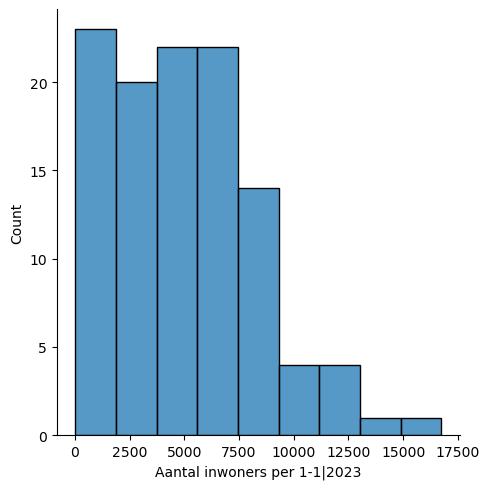

In [30]:
_ = sns.displot(db['Aantal inwoners per 1-1|2023'], kde=False)

Note we are using `sns` instead of `pd`, as the function belongs to `seaborn` instead of `pandas`.

We can quickly see most of the areas contain somewhere between 1,200 and 1,700 people, approx. However, there are a few areas that have many more, even up to 3,500 people.

An additional feature to visualize the density of values is called `rug`, and adds a little tick for each value on the horizontal axis:

/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


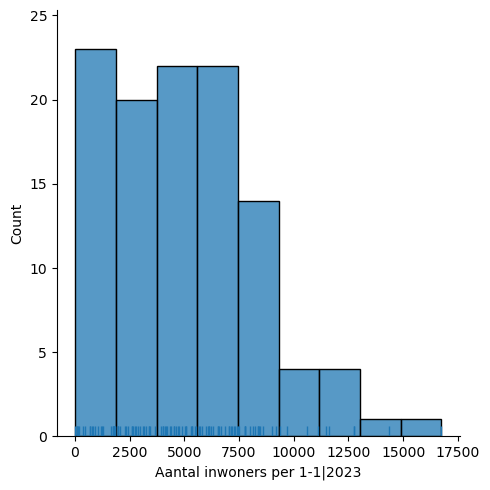

In [31]:
_ = sns.displot(db['Aantal inwoners per 1-1|2023'], kde=False, rug=True)

### Kernel Density Plots <a class="anchor" id="section_2_2"></a>

Histograms are useful, but they are artificial in the sense that a continuous variable is made discrete by turning the values into discrete groups. An alternative is kernel density estimation (KDE), which produces an empirical density function:

/var/folders/x0/nsty_5vx5tb4_z58xnljz1xh0000gn/T/ipykernel_36329/194078108.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ = sns.kdeplot(db['Aantal inwoners per 1-1|2023'], shade=True)
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/philip/anaconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


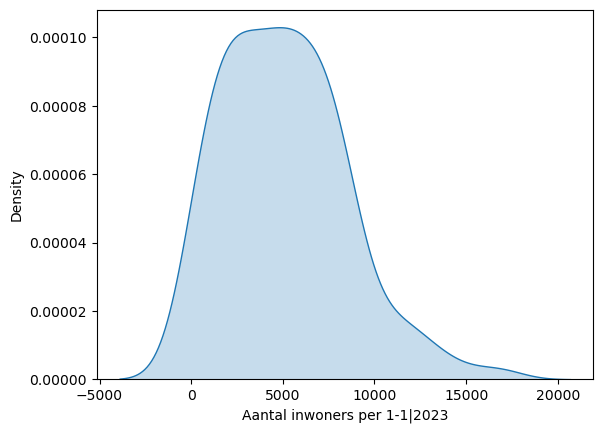

In [32]:
_ = sns.kdeplot(db['Aantal inwoners per 1-1|2023'], shade=True)

### Line and Bar plots <a class="anchor" id="section_2_3"></a>

Another very common way of visually displaying a variable is with a line or a bar chart. For example, if we want to generate a line plot of the (sorted) total population by area:

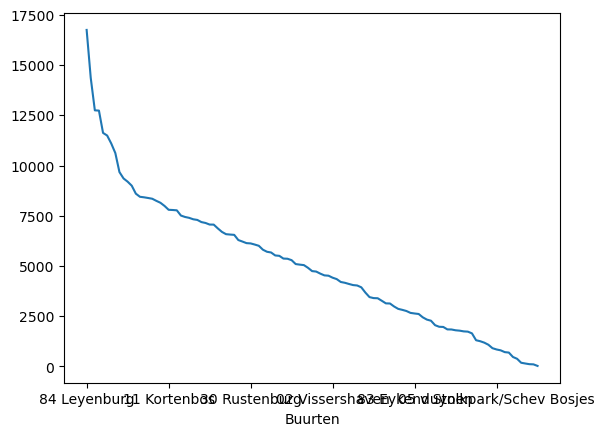

In [33]:
_ = db['Aantal inwoners per 1-1|2023'].sort_values(ascending=False).plot()

For a bar plot all we need to do is to change an argument of the call:

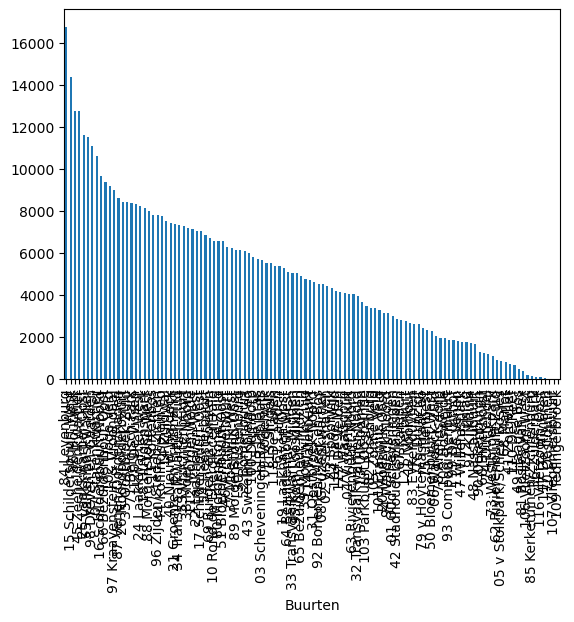

In [34]:
_ = db['Aantal inwoners per 1-1|2023'].sort_values(ascending=False).plot(kind='bar')

Note that the large number of areas makes the horizontal axis unreadable. We can try to turn the plot around by displaying the bars horizontally (see how it's just changing `bar` for `barh`). To make it readable, let us expand the plot's height:

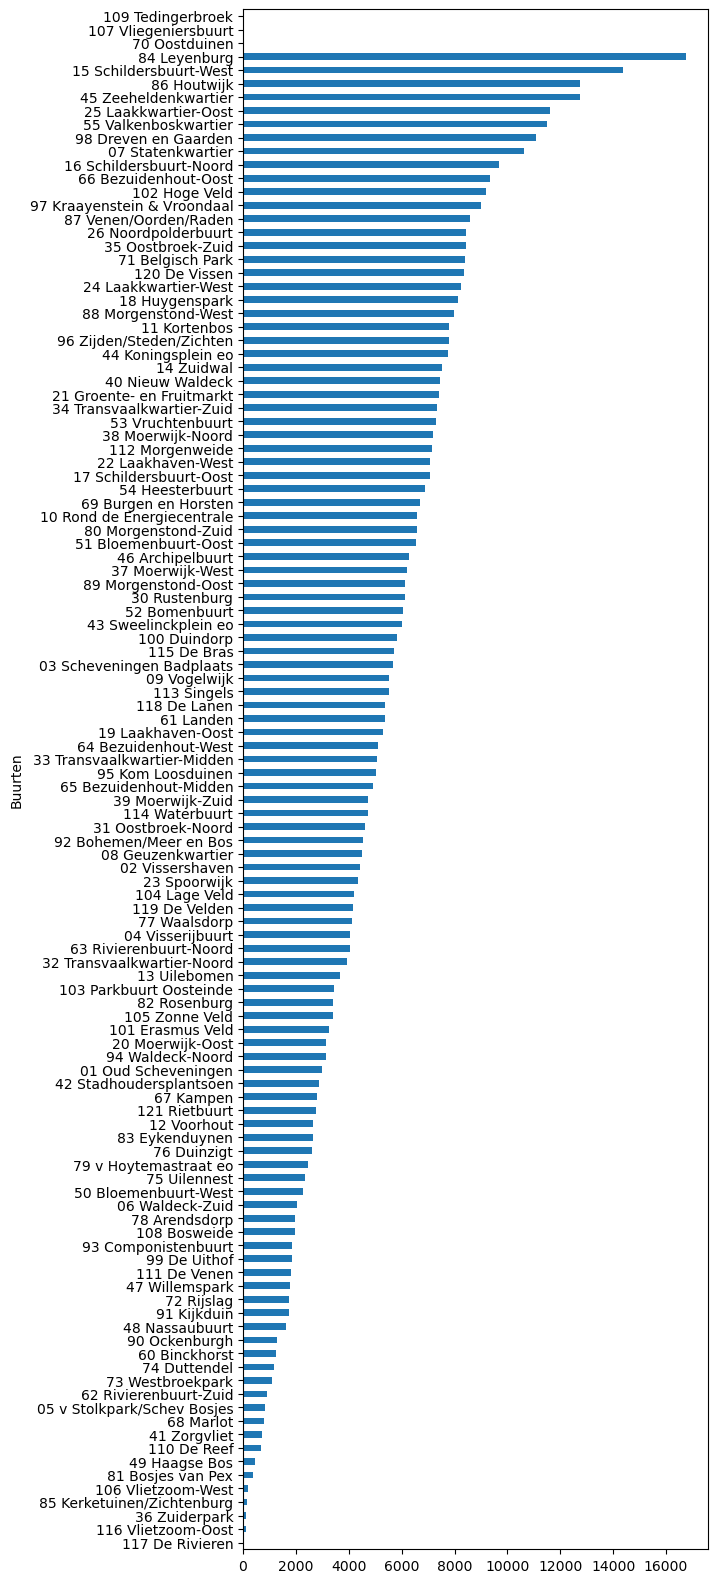

In [35]:
_ = db['Aantal inwoners per 1-1|2023'].sort_values().plot(kind='barh', figsize=(6, 20))

## (Un)tidy data <a class="anchor" id="section3"></a>

> *Happy families are all alike; every
unhappy family is unhappy in its own
way.*

> Leo Tolstoy.

Once you can read your data in, explore specific cases, and have a first visual approach to the entire set, the next step can be preparing it for more sophisticated analysis. Maybe you are thinking of modeling it through regression, or on creating subgroups in the dataset with particular characteristics, or maybe you simply need to present summary measures that relate to a slightly different arrangement of the data than you have been presented with.

For all these cases, you first need what statistician, and general R wizard, Hadley Wickham calls *"tidy data"*. The general idea to "tidy" your data is to convert them from whatever structure they were handed in to you into one that allows convenient and standardized manipulation, and that supports directly inputting the data into what he calls "*tidy*" analysis tools. But, at a more practical level, what is exactly *"tidy data"*? In Wickham's own words:

> *Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,
variables and types.*

He then goes on to list the three fundamental characteristics of *"tidy data"*:

1. Each variable forms a column.
1. Each observation forms a row.
1. Each type of observational unit forms a table.

If you are further interested in the concept of *"tidy data"*, I recommend you check out the [original paper](https://www.jstatsoft.org/v59/i10/) (open access) and the [public repository](https://github.com/hadley/tidy-data) associated with it.

Let us bring in the concept of "*tidy data*" to our own Liverpool dataset. First, remember its structure:

In [36]:
db.head()

,Aantal inwoners per 1-1|2023,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,,
01 Oud Scheveningen,2983.0,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2
02 Vissershaven,4416.0,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7
03 Scheveningen Badplaats,5670.0,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1
04 Visserijbuurt,4048.0,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9
05 v Stolkpark/Schev Bosjes,843.0,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9


Thinking through *tidy* lenses, this is not a tidy dataset. It is not so for each of the three conditions:

* Starting by the last one (*each type of observational unit forms a table*), this dataset actually contains not one but two observational units: the different areas of Liverpool, captured by `GeographyCode`; *and* subgroups of an area. To *tidy* up this aspect, we can create two different tables:

In [37]:
# Assign column `Total` into its own as a single-column table
db_totals = db[['Aantal inwoners per 1-1|2023']]
db_totals.head()

,Aantal inwoners per 1-1|2023
Buurten,
01 Oud Scheveningen,2983.0
02 Vissershaven,4416.0
03 Scheveningen Badplaats,5670.0
04 Visserijbuurt,4048.0
05 v Stolkpark/Schev Bosjes,843.0


In [38]:
# Create a table `db_subgroups` that contains every column in `db` without `Total`
db_subgroups = db.drop('Aantal inwoners per 1-1|2023', axis=1)
db_subgroups.head()

,0 t/m 4 jaar|2023,5 t/m 14 jaar|2023,15 t/m 19 jaar|2023,20 t/m 44 jaar|2023,45 t/m 64 jaar|2023,65 t/m 79 jaar|2023,80 jaar en ouder|2023,% Nederlands|2023,% Turks|2023,% Marokkaans|2023,% Surinaams|2023,% Antilliaans|2023,% Overig niet-westers|2023,% Westers|2023,% Non-Dutch | 2023
Buurten,,,,,,,,,,,,,,,
01 Oud Scheveningen,151.0,272.0,115.0,1035.0,855.0,433.0,122.0,71.8,0.6,1.0,1.4,1.1,6.9,17.2,28.2
02 Vissershaven,195.0,466.0,219.0,1492.0,1185.0,701.0,158.0,66.3,1.2,1.4,2.4,1.0,7.7,20.0,33.7
03 Scheveningen Badplaats,262.0,521.0,266.0,2113.0,1518.0,788.0,202.0,60.9,0.6,0.4,1.8,1.1,9.5,25.7,39.1
04 Visserijbuurt,178.0,444.0,205.0,1343.0,1023.0,591.0,264.0,61.0,0.7,1.6,1.9,1.4,9.8,23.5,38.9
05 v Stolkpark/Schev Bosjes,29.0,75.0,54.0,204.0,254.0,166.0,61.0,49.9,0.8,1.2,0.9,1.3,9.8,35.9,49.9


Note we use `drop` to exclude "Total", but we could also use a list with the names of all the columns to keep. Additionally, notice how, in this case, the use of `drop` (which leaves `db` untouched) is preferred to that of `del` (which permanently removes the column from `db`).

At this point, the table `db_totals` is tidy: every row is an observation, every column is a variable, and there is only one observational unit in the table.

The other table (`db_subgroups`), however, is not entirely tidied up yet: there is only one observational unit in the table, true; but every row is not an observation, and there are variable values as the names of columns (in other words, every column is not a variable). To obtain a fully tidy version of the table, we need to re-arrange it in a way that every row is a population subgroup in an area, and there are three variables: `GeographyCode`, population subgroup, and population count (or frequency). 

Because this is actually a fairly common pattern, there is a direct way to solve it in `pandas`:

In [39]:
tidy_subgroups = db_subgroups.stack()
tidy_subgroups.head()

Buurten                                 
01 Oud Scheveningen  0 t/m 4 jaar|2023       151.0
                     5 t/m 14 jaar|2023      272.0
                     15 t/m 19 jaar|2023     115.0
                     20 t/m 44 jaar|2023    1035.0
                     45 t/m 64 jaar|2023     855.0
dtype: float64

The method `stack`, well, "stacks" the different columns into rows. This fixes our "tidiness" problems but the type of object that is returning is not a `DataFrame`:

In [40]:
type(tidy_subgroups)

pandas.core.series.Series

It is a `Series`, which really is like a `DataFrame`, but with only one column. The additional information (`GeographyCode` and population group) are stored in what is called an multi-index. We will skip these for now, so we would really just want to get a `DataFrame` as we know it out of the `Series`. This is also one line of code away:

In [41]:
# Unfold the multi-index into different, new columns
tidy_subgroupsDF = tidy_subgroups.reset_index()
tidy_subgroupsDF.head()

,Buurten,level_1,0
0,01 Oud Scheveningen,0 t/m 4 jaar|2023,151.0
1,01 Oud Scheveningen,5 t/m 14 jaar|2023,272.0
2,01 Oud Scheveningen,15 t/m 19 jaar|2023,115.0
3,01 Oud Scheveningen,20 t/m 44 jaar|2023,1035.0
4,01 Oud Scheveningen,45 t/m 64 jaar|2023,855.0


To which we can apply to renaming to make it look better:

In [42]:
tidy_subgroupsDF = tidy_subgroupsDF.rename(columns={'level_1': 'Subgroup', 0: 'Freq'})
tidy_subgroupsDF.head()

,Buurten,Subgroup,Freq
0,01 Oud Scheveningen,0 t/m 4 jaar|2023,151.0
1,01 Oud Scheveningen,5 t/m 14 jaar|2023,272.0
2,01 Oud Scheveningen,15 t/m 19 jaar|2023,115.0
3,01 Oud Scheveningen,20 t/m 44 jaar|2023,1035.0
4,01 Oud Scheveningen,45 t/m 64 jaar|2023,855.0


Now our table is fully tidied up!

### Grouping, transforming, aggregating <a class="anchor" id="section_3_1"></a>

One of the advantage of tidy datasets is they allow to perform advanced transformations in a more direct way. One of the most common ones is what is called "group-by" operations. Originated in the world of databases, these operations allow you to group observations in a table by one of its labels, index, or category, and apply operations on the data group by group. 

For example, given our tidy table with population subgroups, we might want to compute the total sum of population by each group. This task can be split into two different ones:

* Group the table in each of the different subgroups.
* Compute the sum of `Freq` for each of them.

To do this in `pandas`, meet one of its workhorses, and also one of the reasons why the library has become so popular: the `groupby` operator.

In [43]:
pop_grouped = tidy_subgroupsDF.groupby('Subgroup')
pop_grouped

The object `pop_grouped` still hasn't computed anything, it is only a convenient way of specifying the grouping. But this allows us then to perform a multitude of operations on it. For our example, the sum is calculated as follows:

In [44]:
pop_grouped.sum()

,Buurten,Freq
Subgroup,,
% Antilliaans|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,253.0
% Marokkaans|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,500.8
% Nederlands|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,5167.4
% Non-Dutch | 2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,5325.5
% Overig niet-westers|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,1380.0
% Surinaams|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,744.0
% Turks|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,665.8
% Westers|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,2365.1
0 t/m 4 jaar|2023,01 Oud Scheveningen02 Vissershaven03 Schevenin...,28777.0


Similarly, you can also obtain a summary of each group:

In [45]:
pop_grouped.describe()

Freq                                           \
                            count         mean          std   min      25%   
Subgroup                                                                     
% Antilliaans|2023          102.0     2.480392     2.011110   0.3    1.100   
% Marokkaans|2023            95.0     5.271579     5.309900   0.1    1.100   
% Nederlands|2023           111.0    46.553153    20.036666   5.8   27.900   
% Non-Dutch | 2023           94.0    56.654255    19.206835  21.0   40.100   
% Overig niet-westers|2023  109.0    12.660550     5.379695   3.3    8.800   
% Surinaams|2023            104.0     7.153846     5.091472   0.5    2.200   
% Turks|2023                103.0     6.464078     7.530967   0.3    1.050   
% Westers|2023              110.0    21.500909     8.391034   7.3   13.975   
0 t/m 4 jaar|2023           107.0   268.943925   189.016363  10.0  118.500   
15 t/m 19 jaar|2023         107.0   302.934579   213.279083   8.0  110.500   
20 t/m 44 jaar|2023         110.0  1914.481818  1474.818973   5.0  714.500   
45 t/m 64 jaar|2023         111.0  1308.882883   861.831124  13.0  644.000   
5 t/m 14 jaar|2023          107.0   574.616822   393.491067   6.0  257.000   
65 t/m 79 jaar|2023         110.0   589.663636   406.969022   5.0  316.500   
80 jaar en ouder|2023       107.0   183.934579   154.038483   5.0   80.000   

                                                       
                                50%       75%     max  
Subgroup                                               
% Antilliaans|2023             1.85     3.400    11.7  
% Marokkaans|2023              3.90     7.750    24.7  
% Nederlands|2023             49.60    61.250   100.0  
% Non-Dutch | 2023            54.10    75.600    94.2  
% Overig niet-westers|2023    11.10    16.600    28.0  
% Surinaams|2023               6.70    11.525    21.1  
% Turks|2023                   3.00    10.000    28.4  
% Westers|2023                20.75    27.025    40.8  
0 t/m 4 jaar|2023            245.00   399.000   889.0  
15 t/m 19 jaar|2023          285.00   442.000   989.0  
20 t/m 44 jaar|2023         1640.00  2835.750  6768.0  
45 t/m 64 jaar|2023         1205.00  1866.500  4004.0  
5 t/m 14 jaar|2023           528.00   845.500  1738.0  
65 t/m 79 jaar|2023          498.00   799.750  2343.0  
80 jaar en ouder|2023        144.00   225.500   750.0

We will not get into it today as it goes beyond the basics we want to cover, but keep in mind that `groupby` allows you to not only call generic functions (like `sum` or `describe`), but also your own functions. This opens the door for virtually any kind of transformation and aggregation possible.
